### Rlab02 - Martina Cacciola (2097476)

## Exercise 1 - Discrete random variable

In [1]:
library(rvest)
library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(tidyr)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.2     v purrr   1.0.1
v tibble  3.2.1     v dplyr   1.1.2
v tidyr   1.3.0     v stringr 1.5.0
v readr   2.1.4     v forcats 1.0.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()         masks stats::filter()
x readr::guess_encoding() masks rvest::guess_encoding()
x dplyr::lag()            masks stats::lag()

Caricamento pacchetto: 'lubridate'


I seguenti oggetti sono mascherati da 'package:base':

    date, intersect, setdiff, union




## 1)

In [10]:
#probability density function
prob_d <- function(k) {
  p <- numeric(length(k))
  p[k >= 1 & k <= 5 & k %% 1 == 0] <- k[k >= 1 & k <= 5 & k %% 1 == 0]/15
  return(p)
}

#cumulative density function
cum_d <- function(k){
    return(cumsum(prob_d(k)))
}

## 2)

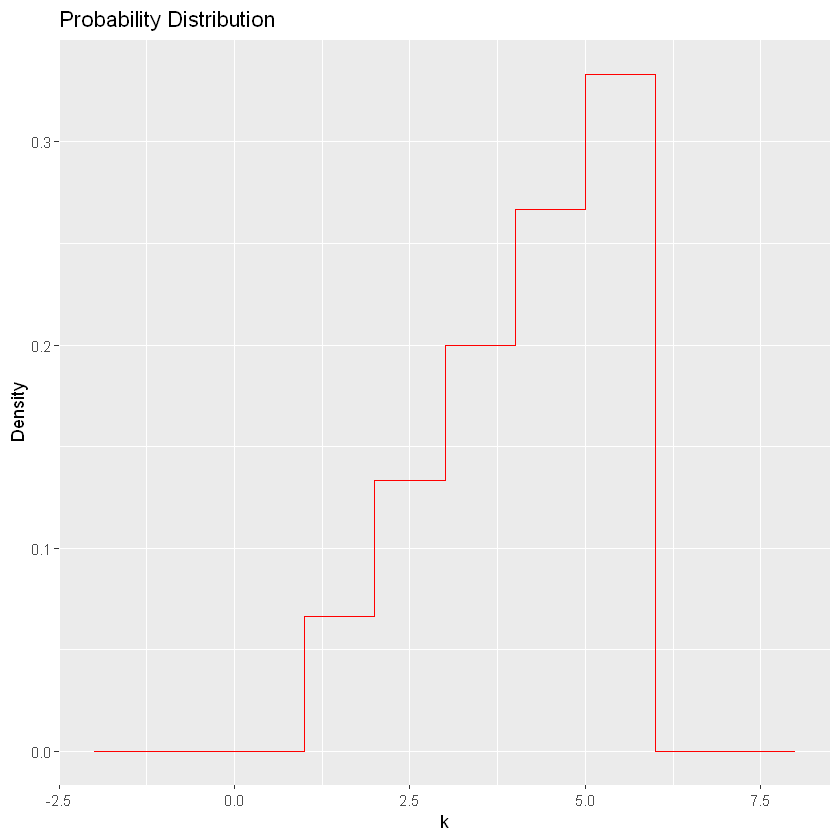

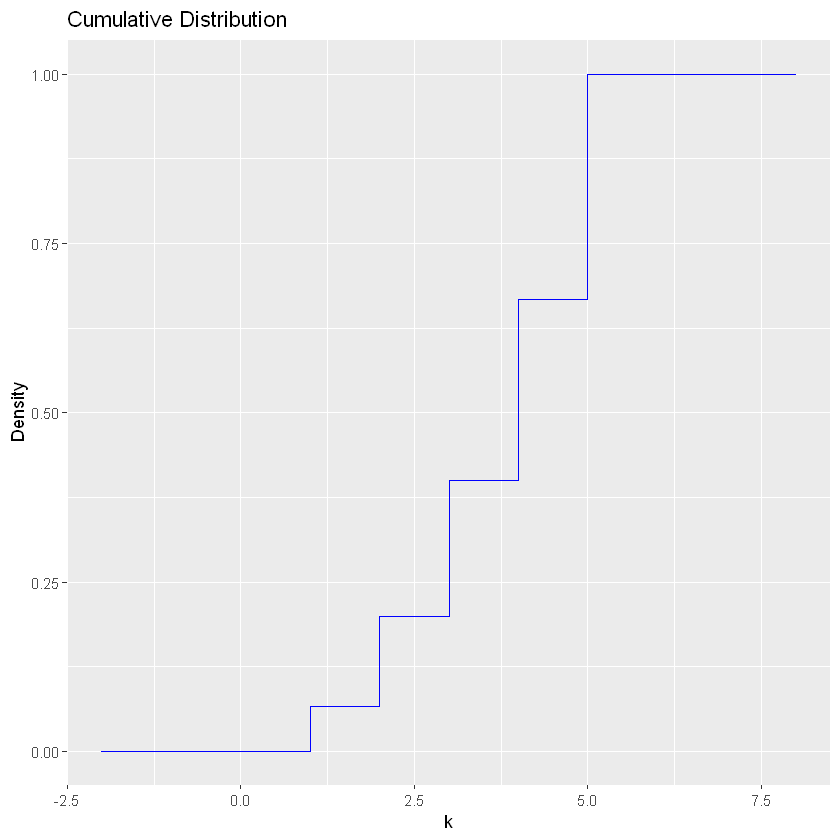

In [11]:
k = -2:8
# Probability Distribution Plot
ggplot() + 
  geom_step(aes(x = k, y = prob_d(k)), color = 'red') +
  labs(title = "Probability Distribution", x = "k", y = "Density")

# Cumulative Distribution Plot
ggplot() + 
  geom_step(aes(x = k, y = cum_d(k)), color = 'blue') +
  labs(title = "Cumulative Distribution", x = "k", y = "Density")    

## 3)

In [12]:
# Define the range of k values
k_values <- 1:5

# Calculate the probabilities
pk <- ifelse(k_values >= 1 & k_values <= 5, k_values/15, 0)

# Compute the mean
mean_k <- sum(k_values * pk)

# Compute the variance
var_k <- sum((k_values - mean_k)^2 * pk)

# Print the results
cat("Mean Value: ", mean_k, "\n")
cat("Variance: ", var_k, "\n")

Mean Value:  3.666667 
Variance:  1.555556 


## 4)

We want to compute the expected value of the variable `k * (6-k)` given the probability density function `f(k)`. The expected value of a discrete random variable `X` with probability density function `p(x)` is defined as the sum of the products of each possible value of `X` and its probability: `E[X] = sum(x * p(x))`. 

In [14]:
# Create a vector with all possible values of k(6-k)
k_values <- 1:5
X <- k_values*(6-k_values)
# Apply the prob_d function to each element of X
prob <- sapply(X, prob_d)

# Compute the expected value E[k(6-k)]
expected_value <- sum(prob*X) 
cat(paste('Expected value:', round(expected_value,3)))

Expected value: 3.333

## 5)

In [16]:
# Define the sample_from_f function
sample_from_f <- function(n) {
  sample(1:5, size = n, replace = TRUE, prob = sapply(1:5, f))
}

# Sample 10 random numbers from the probability distribution defined by f(k)
samples <- sample_from_f(10)
cat("Sample:", samples)

Sample: 1 3 5 4 4 4 5 3 4 5

## 6)

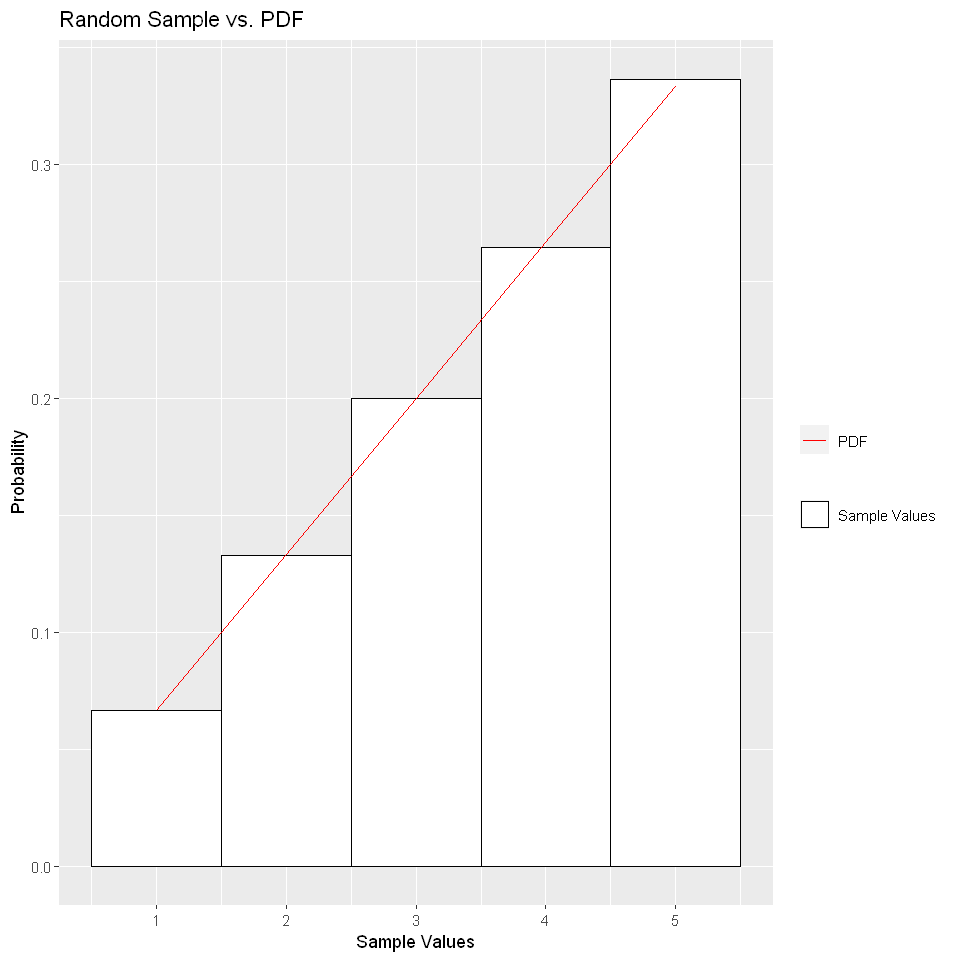

In [18]:
# Sample 10^5 random numbers from the probability distribution defined by p(k)
samples <- sample_from_f(10^5)

# Create a data frame with the samples and their counts
df <- data.frame(samples)

# Create a data frame with the probability density function
k <- 1:5
p_k <- k/15
density_df <- data.frame(k=k, p_k=p_k)

# Plot the histogram of the samples and the probability density function
ggplot(df, aes(x=samples)) +
  geom_histogram(aes(y=after_stat(density),fill="Sample Values"), binwidth=1, color="black") +
  geom_line(data=density_df, aes(x=k, y=p_k, color="PDF")) +
  labs(title='Random Sample vs. PDF', x='Sample Values', y='Probability') +
  scale_fill_manual(name="", values=c("Sample Values"="white")) +
  scale_color_manual(name="", values=c("PDF"="red")) +
  guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL))
options(repr.plot.width=8, repr.plot.height=8)

Da togliere

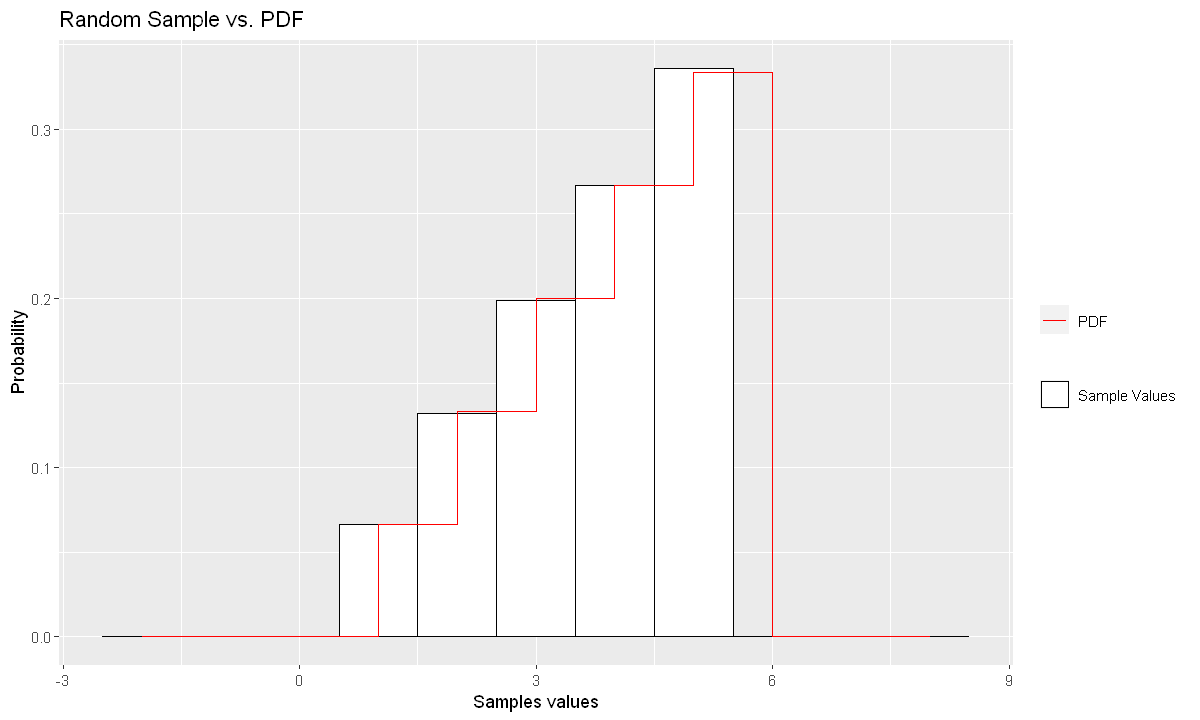

In [13]:
# Sample 10^5 random numbers from the probability distribution defined by f(k)
samples <- sample_from_f(100000)
# Create a data frame with the samples and their counts
df = data.frame(x= samples)

# Create a data frame with the probability and cumulative density
density_df <- data.frame(x=k, y=prob_d(k), z=cum_d(k))

ggplot() + 
    geom_histogram(data=df, aes(x=samples, y=after_stat(density), fill="Sample Values"),color="black", binwidth=1)+
    labs(title='Random Sample vs. PDF', x='Samples values', y='Probability')+
    geom_step(data=density_df, aes(x = k, y = y, color='PDF')) +
    scale_fill_manual(name="", values=c("Sample Values"="white")) +
    scale_color_manual(name="", values=c("PDF"="red")) +
    guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL))
options(repr.plot.width=9, repr.plot.height=6)

## Exercise 2 - Continuous random variable

## a)

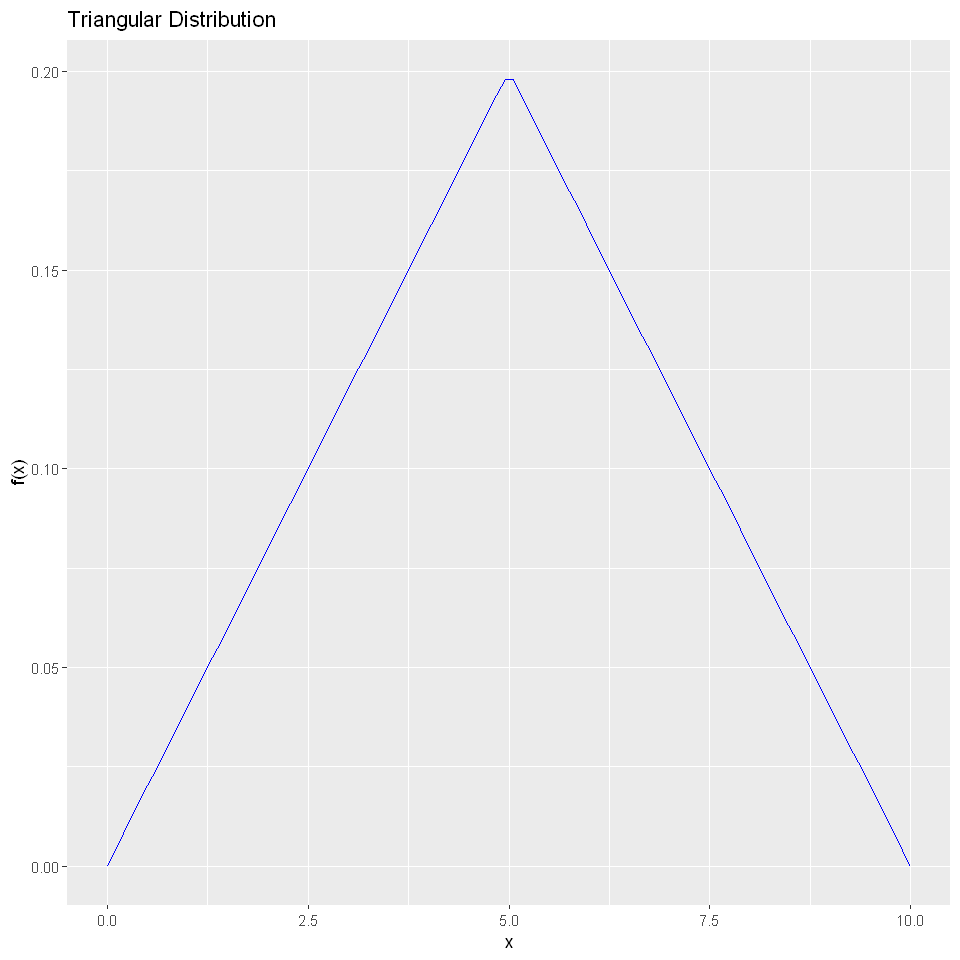

In [37]:
# Define the function f(x)
f <- function(x, a, b, c) {
  ifelse(x >= a & x < c, 2 * (x - a) / ((b - a) * (c - a)),
         ifelse(x >= c & x <= b, 2 * (b - x) / ((b - a) * (b - c)), 0))
}

# Set the values of a, b and c
a <- 0
b <- 10
c <- 5

# Create a data frame with x values in the interval (a, b)
x_df <- data.frame(x = seq(a, b, length.out = 100))

# Plot the function f(x)
ggplot(x_df, aes(x = x, y = f(x, a, b, c))) +
  geom_line(color = "blue") +
  labs(title = "Triangular Distribution", x = "x", y = "f(x)")

## b)

In [38]:
# Define the inverse cumulative distribution function (CDF) of f(x)
inv_cdf <- function(p, a, b, c) {
  ifelse(p < (c - a) / (b - a), a + sqrt(p * (b - a) * (c - a)),
         b - sqrt((1 - p) * (b - a) * (b - c)))
}

# Set the values of a, b and c
a <- 0
b <- 10
c <- 5

# Generate 10 random numbers from the triangular distribution
samples <- inv_cdf(runif(10), a, b, c)
cat("Sample:", samples)

Sample: 6.482074 4.435239 5.66016 5.457403 5.362297 9.45672 5.136338 6.802621 6.474867 3.70032

## c)

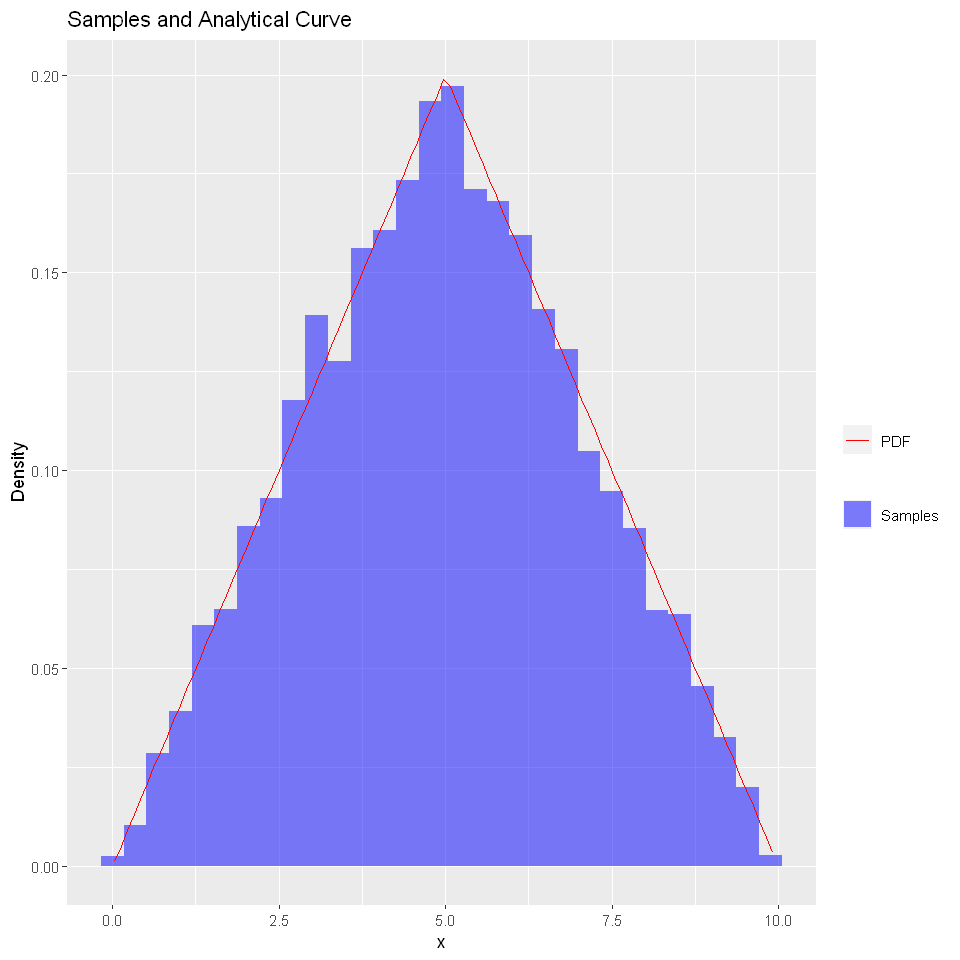

In [41]:
# Generate 10^4 random numbers from the triangular distribution
samples <- inv_cdf(runif(10^4), a, b, c)

# Plot the samples as a histogram and superimpose the analytical curve
ggplot(data.frame(x = samples), aes(x = x)) +
  geom_histogram(aes(y = after_stat(density), fill = "Samples"), bins = 30, alpha = 0.5) +
  stat_function(fun = function(x) f(x, a, b, c), aes(color = "PDF")) +
  labs(title = "Samples and Analytical Curve", x = "x", y = "Density")+
  scale_fill_manual(name="", values=c("Samples"="blue")) +
  scale_color_manual(name="", values=c("PDF"="red")) +
  guides(fill=guide_legend(title=NULL), color=guide_legend(title=NULL))              

## Exercise 3 

## a)

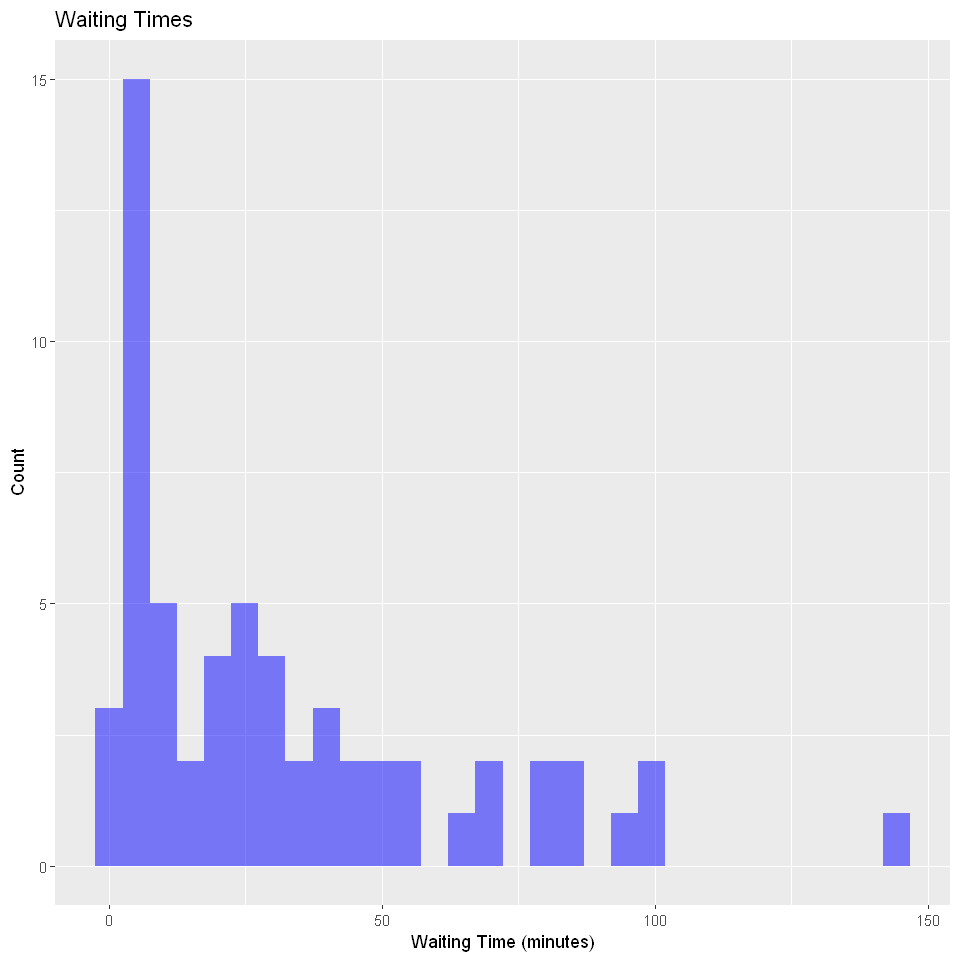

In [19]:
# Set the rate of the exponential distribution
rate <- 1/30

# Simulate the waiting time for 60 people at the doctor's office
waiting_times <- rexp(60, rate = rate)

# Plot the waiting times as a histogram
ggplot(data.frame(x = waiting_times), aes(x = x)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.5) +
  labs(title = "Waiting Times", x = "Waiting Time (minutes)", y = "Count")

## b)

In [25]:
# Define the time value for which we calculate the probability
time <- 12

# Use the pexp function to calculate the probability of waiting less than the specified time
prob <- pexp(time, rate)
cat("Probability of waiting less than", time, "minutes:", round(prob*100,2),"%")

Probability of waiting less than 12 minutes: 32.97 %

## c)

In case of an exponential distribution, the expected value is given by $E[x]=1/\lambda$ where $\lambda$ corresponds to the rate parameter.

In [26]:
# Calculate the average waiting time from the simulated data
avg_waiting_time <- mean(waiting_times)

# Calculate the expected value of the waiting time from theory
theoretical_value <- 1/rate

# Compare the average waiting time with the expected value
cat("Average waiting time from simulated data:", round(avg_waiting_time,2), "min", "\n")
cat("Expected waiting time from theory:", theoretical_value, "min")

Average waiting time from simulated data: 32.19 min 
Expected waiting time from theory: 30 min

## d)

In [27]:
# Set the time value for which we calculate the probability
time <- 60

# Calculate the probability of waiting more than the specified time
prob <- 1 - pexp(time, rate)

# Print the result
cat("Probability of waiting more than", time, "minutes:", round(prob*100,2), "%")

Probability of waiting more than 60 minutes: 13.53 %

## Exercise 4 -Multiple choices exams

Let `K` be the event that the student knows the answer and `C` be the event that the student gives a correct answer. We want to find the probability that the student knows the answer given that they gave a correct answer, or `P(K|C)`.

There are 5 possible answers. We are given that `P(K) = 0.7`, the probability that the student knows the answer and `P(N) = 1-0.7 = 0.3` of not knowing the answer. If the student does not know the answer, they have a 1/5 chance of guessing correctly, so `P(C|N) = 1/5` and `P(W|N) =4/5` chance of doing wrong. If the student knows the answer, they will always give a correct answer, so `P(C|K) = 1`.

Using Bayes’ theorem, we can calculate `P(K|C)` as follows:

$P(K|C) = \frac{P(C|K) \cdot P(K)}{P(C)} = \frac{P(C|K) \cdot P(K)}{P(C|K) \cdot P(K) + P(C|N) \cdot P(N)}$

In [28]:
# Set the probability that the student knows the answer
p <- 0.7

# Calculate the probability that the student gives a correct answer given that they know it
p_C_given_K <- 1

# Calculate the probability that the student gives a correct answer given that they don't know it
p_C_given_N <- 1/5

# Use Bayes' theorem
p_K_given_C <- p_C_given_K * p / (p_C_given_K * p + p_C_given_N * (1 - p))

# Print the result
cat("Probability that the student knew the correct answer:", round(p_K_given_C*100,2), "%")

Probability that the student knew the correct answer: 92.11 %

## Exercise 5 - Waiting time

## a)

In [66]:
# Calculate the probability of waiting at most 10 minutes for a person who arrives at a random time between 10:45 and 11:45
start_time <- as.POSIXct("10:45", format="%H:%M")
end_time <- as.POSIXct("11:45", format="%H:%M")
half_hours <- seq(from=start_time, to=end_time, by="30 mins")
waiting_times <- difftime(half_hours, start_time, units="mins")
prob <- length(waiting_times[waiting_times <= 10])/length(half_hours)

# Print the result
cat("Probability of waiting at most 10 minutes:", prob*100,"%") 

Probability of waiting at most 10 minutes: 33.33333 %

This code simulates 10000 arrival times uniformly distributed between 10:45 and 11:45, computes the waiting times by taking the modulo 0.5 (half an hour) of the arrival times, and then computes the conditional probabilities of waiting at most 10 minutes given that the person arrives in one of the two temporal slots where the average waiting time is less than or equal to 15 minutes. Finally, it computes the total probability using the law of total probability as the weighted sum of the conditional probabilities.

In [33]:
# Set the seed for reproducibility
set.seed(123)

# Simulate 10000 arrival times uniformly distributed between 10:45 and 11:45
arrival_times <- runif(10000, 10 + 45/60, 11 + 45/60)

# Compute the waiting times by taking the modulo 0.5 (half an hour) of the arrival times
waiting_times <- arrival_times %% 0.5

# Compute the probability of waiting at most 10 minutes
prob <- mean(waiting_times <= 10/60)

# Print the result
cat("Probability of waiting at most 10 minutes:", round(prob*100,2),"%")

Probability of waiting at most 10 minutes: 33.36 %

The probability of waiting at most `max_waiting_time` minutes is calculated assuming that the person arrives at a random time between two consecutive trains and that the time between two consecutive trains is uniformly distributed between `a` and `b` minutes. The probability is given by the ratio of `max_waiting_time` to the difference between `b` and `a`, which represents the total time interval between two consecutive trains.

In [29]:
# Set the lower and upper bounds of the uniform distribution
a <- 0
b <- 30   #half an hour

# Set the maximum waiting time
max_waiting_time <- 10

# Calculate the probability of waiting at most max_waiting_time minutes
prob <- max_waiting_time / (b - a)

# Print the result
cat("Probability of waiting at most", max_waiting_time, "minutes:", round(prob*100,2),"%")

Probability of waiting at most 10 minutes: 33.33 %

## b)

The probability of an event occurring when the underlying distribution is uniform is equal to the length of the interval during which the event occurs divided by the length of the total interval. In this case, the event of interest is waiting at least `min_waiting_time` minutes, which occurs during an interval of length `b - min_waiting_time`, and the total interval is of length `b - a`.

In [64]:
# Set the minimum waiting time
min_waiting_time <- 15

# Calculate the probability of waiting at least min_waiting_time minutes
prob <- (b - min_waiting_time) / (b - a)

# Print the result
cat("Probability of waiting at least", min_waiting_time, "minutes:", prob*100,"%")

Probability of waiting at least 15 minutes: 50 %

In [34]:
# Compute the waiting times by taking the modulo 0.5 (half an hour) of the arrival times
waiting_times <- arrival_times %% 0.5

# Compute the probability of waiting at least 15 minutes
prob <- mean(waiting_times >= 15/60)
# Print the result
cat("Probability of waiting at least 15 minutes:", prob*100,"%") 

Probability of waiting at least 15 minutes: 49.83 %

## c)

In [32]:
# Set the lower and upper bounds of the uniform distribution
a <- 0
b <- 30  

# Calculate the expected waiting time
average_waiting_time <- (a + b) / 2

# Print the result
cat("Average waiting time:", average_waiting_time, "minutes")

Average waiting time: 15 minutes

In [62]:
# Compute the waiting times by taking the modulo 0.5 (half an hour) of the arrival times
waiting_times <- arrival_times %% 0.5

# Compute the average waiting time
avg_waiting_time <- mean(waiting_times)
avg_waiting_time

[1] 0.2495494

## Exercise 6 - Stock investment

In [31]:
# Set the mean and standard deviation of the normal distribution
mean <- 0.10
sd <- 0.12

# Set the number of shares and price per share
n_shares <- 200
price_per_share <- 85

# Set the minimum net profit
min_net_profit <- 800

# Calculate the minimum return rate required to achieve the minimum net profit
min_return_rate <- min_net_profit / (n_shares * price_per_share)

# Calculate the probability of achieving at least the minimum return rate
prob <- 1 - pnorm(min_return_rate, mean, sd)

# Print the result
cat("Probability of achieving a net profit of at least", min_net_profit, "euros:", round(prob*100,2),"%")

Probability of achieving a net profit of at least 800 euros: 67.05 %